In [2]:
import matplotlib.pyplot as plt #importing libraries
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(url) # loading the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


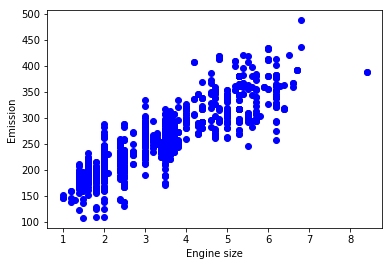

In [9]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue') # visualizing features we'll use for regression
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [55]:
#splitting data for training & testing
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] #defining X
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [57]:
from sklearn import linear_model
regr = linear_model.LinearRegression() #fitting the model
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients are ', regr.coef_,"\nIntercept :", regr.intercept_)

Coefficients are  [[11.2676273   7.32985753  9.48904736]] 
Intercept : [65.87058512]


In [60]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) 
tx = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #prediction
ty = np.asanyarray(test[['CO2EMISSIONS']])
regr.fit (tx, ty)
print ('Coefficients are ', regr.coef_,"\nIntercept :", regr.intercept_)
print("Residual sum of squares: %.2f"% np.mean((y_hat - ty) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(tx, ty))

Coefficients are  [[ 8.81964465  8.40861426 10.13523646]] 
Intercept : [61.88476754]
Residual sum of squares: 524.15
Variance score: 0.86


In [ ]:
#Hope this was helpful, reach out to me on huzaifatausif0406@outlook.com, for any other queries or questions.